In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

import numpy as np
from pythtb import *
from wpythtb import Bloch, K_mesh, Wannier
import models

import matplotlib.pyplot as plt
from itertools import product

/Users/treycole/Repos/WanPy/dev


In [2]:
# tight-binding parameters
delta = 1
t = 1
t2 = -0.3

n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

#############

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
recip_lat_vecs = model.get_recip_lat_vecs()
orb_vecs = model.get_orb()
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

nkx = nky = 20
bloch_wfs = Bloch(model, nkx, nky)
bloch_wfs.solve_model()
chern = bloch_wfs.chern_num()

# model_str = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}'

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern: .1f}")

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern # occupied:  1.0


(<Figure size 640x480 with 2 Axes>, <Axes: ylabel='Energy $E(\\mathbf{{k}})$'>)

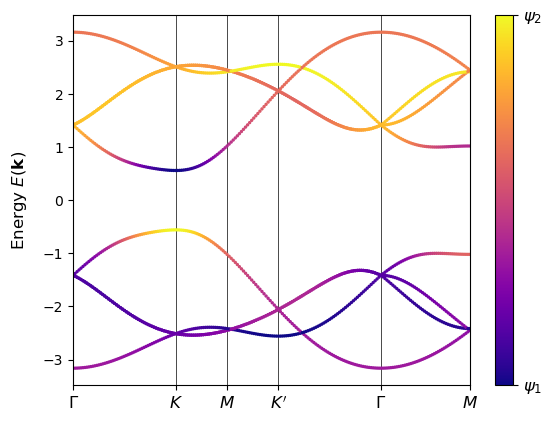

In [3]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
k_label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
(k_vec, k_dist, k_node) = model.k_path(k_path, 101, report=False)

model.plot_bands(k_path, k_label=k_label, nk=201, scat_size=2, proj_orb_idx=high_E_sites, cmap='plasma')

In [4]:
k_mesh = K_mesh(model, nkx, nky)

flat_mesh = k_mesh.gen_k_mesh(endpoint=False)
sq_mesh = k_mesh.gen_k_mesh(flat=False, endpoint=False)

In [7]:
w_b, _, idx_shell = k_mesh.get_weights(N_sh=1)

idx_shell[0]

array([[-1, -1],
       [-1,  0],
       [ 0, -1],
       [ 0,  1],
       [ 1,  0],
       [ 1,  1]])

In [5]:
k_mesh.idx_arr

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 

In [5]:
u_wfs_2d = wf_array(model, [nkx+1, nky+1])
u_wfs_2d.solve_on_grid([0, 0])

berry_flux = u_wfs_2d.berry_flux([i for i in range(n_occ)], individual_phases=True)

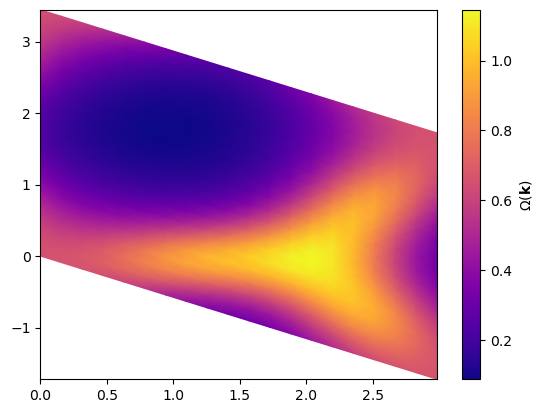

In [6]:
mesh_Cart = sq_mesh @ recip_lat_vecs

KX = mesh_Cart[:, :, 0]
KY = mesh_Cart[:, :, 1]

N_cells = np.prod([ nk-1 for nk in (nkx, nky)])
dV = model.get_recip_vol()/N_cells

im = plt.pcolormesh(KX, KY, berry_flux/dV, cmap='plasma', shading='gouraud')
plt.colorbar(label=r'$\Omega(\mathbf{k})$')

In [24]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
k_label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
(k_vec, k_dist, k_node) = model.k_path(k_path, 101, report=False)

Berry_curv = bloch_wfs.berry_curv(dirs=(0,1), state_idx=np.arange(n_occ))
Berry_curv_path = bloch_wfs.interp_op(Berry_curv, k_vec, plaq=True)

omega_i_k = bloch_wfs.trace_metric()
omega_i_k_path = bloch_wfs.interp_op(omega_i_k[..., np.newaxis], k_vec)

omega_i = np.sum(omega_i_k)
print(omega_i)

(-3.507410479795073e-12-2.3413019469512256e-14j)


In [15]:
omega_i_k.shape

(20, 20, 1)

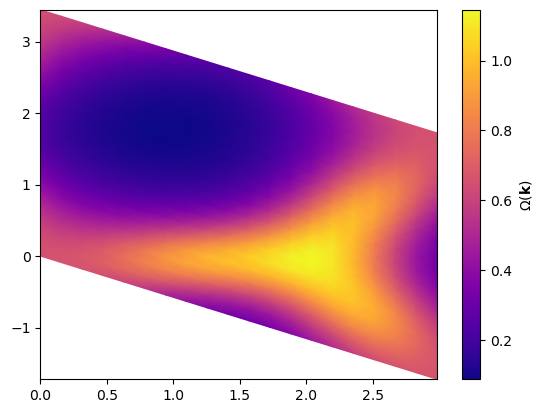

In [13]:
im = plt.pcolormesh(KX, KY, Berry_curv.real, cmap='plasma', shading='gouraud')
plt.colorbar(label=r'$\Omega(\mathbf{k})$')

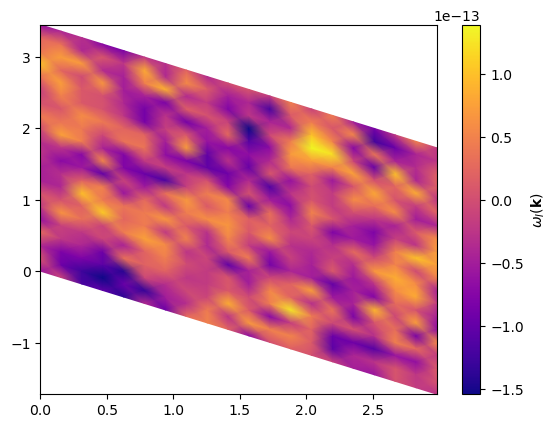

In [14]:
im = plt.pcolormesh(KX, KY, omega_i_k[:,:,0].real, cmap='plasma', shading='gouraud')
plt.colorbar(label=r'$\omega_I(\mathbf{k})$')

Text(0.5, 1.0, 'Traced metric $\\omega_I$')

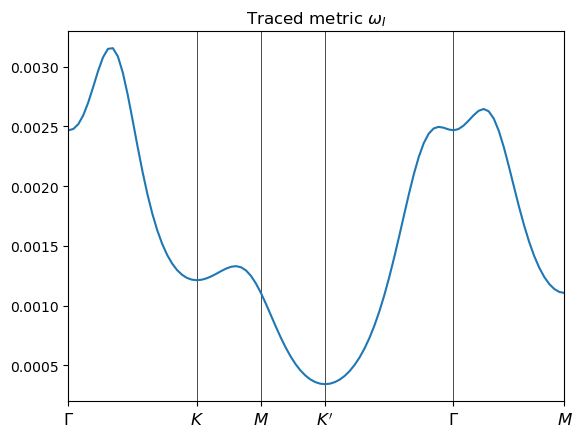

In [183]:
fig, ax = plt.subplots()

ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')
if k_label is not None:
    ax.set_xticklabels(k_label, size=12)

ax.plot(k_dist, omega_i_k_path.real)
ax.set_title(r"Traced metric $\omega_I$")

Text(0.5, 1.0, 'Berry Curvature')

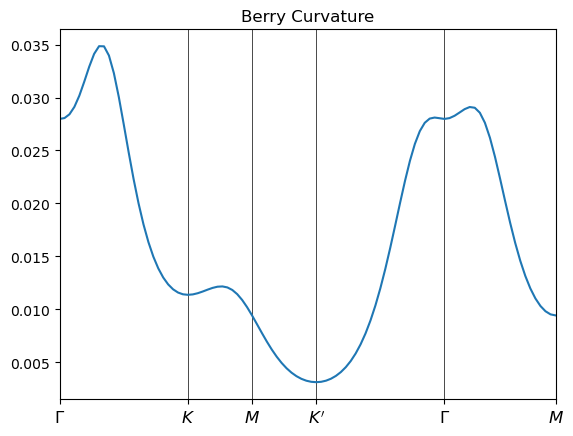

In [10]:
fig, ax = plt.subplots()

ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')
if k_label is not None:
    ax.set_xticklabels(k_label, size=12)

ax.plot(k_dist, Berry_curv_path.real)
ax.set_title("Berry Curvature")

Text(0.5, 1.0, 'Berry Curvature')

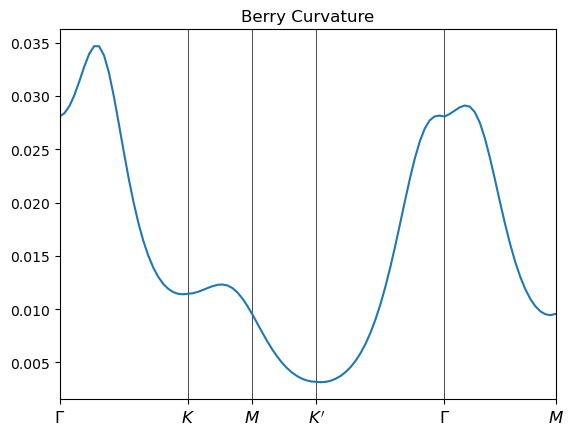

In [184]:
fig, ax = plt.subplots()

ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')
if k_label is not None:
    ax.set_xticklabels(k_label, size=12)

ax.plot(k_dist, Berry_curv_path.real)
ax.set_title("Berry Curvature")